In [188]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [189]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [190]:
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [191]:
rets = me_m[["Lo 10", "Hi 10"]]

In [192]:
rets.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


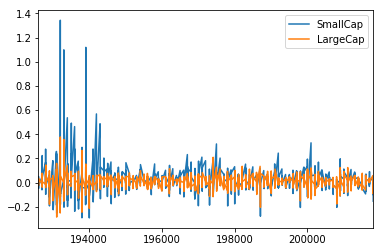

In [193]:
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100

rets.plot.line()

In [194]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")

In [195]:
rets.index = rets.index.to_period('M')

In [196]:
rets.tail()

,SmallCap,LargeCap
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253
2018-12,-0.1531,-0.0890


In [197]:
rets['2010']

,SmallCap,LargeCap
2010-01,0.0300,-0.0356
2010-02,0.0279,0.0296
2010-03,0.0803,0.0590
2010-04,0.1131,0.0112
2010-05,-0.0871,-0.0793
2010-06,-0.0885,-0.0563
2010-07,0.0406,0.0737
2010-08,-0.0687,-0.0419
2010-09,0.0916,0.0926
2010-10,0.0443,0.0450


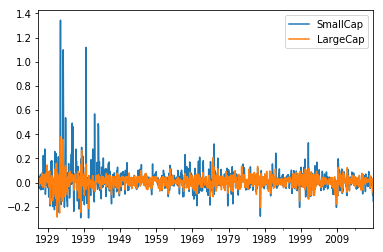

In [198]:
rets.plot.line()

# Compute Drawdown
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown which is wealth value as % of previous peak 

In [199]:
wealth_index = 1000 * (1 + rets['LargeCap']).cumprod()

In [200]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

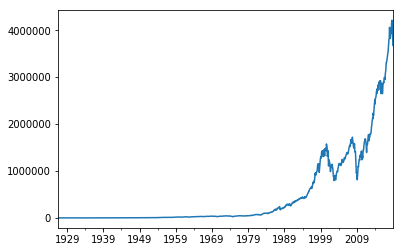

In [201]:
wealth_index.plot.line()

In [202]:
previous_peaks = wealth_index.cummax()

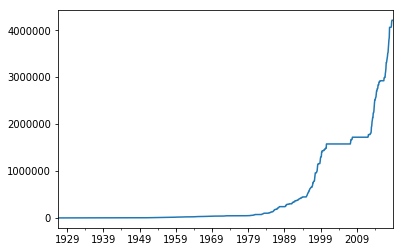

In [203]:
previous_peaks.plot.line()

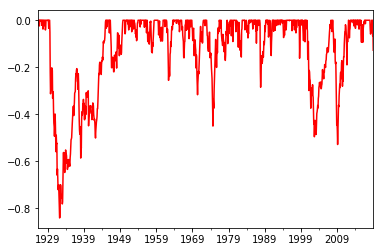

In [204]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot(color='r')

In [205]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [206]:
drawdown.min()

-0.8400375277943123

In [207]:
drawdown['1975':].min()

-0.5280945042309304

In [208]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [209]:
def compute_drawdown(return_series: pd.Series):
    """
    computer drawdons, returns pandas data frame
    """
    wealth_index = 1000 * (1 + rets['LargeCap']).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        'Wealth': wealth_index, 
        'Peaks': previous_peaks, 
        'Drawdowns': drawdowns
                        })

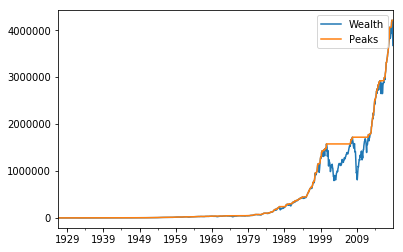

In [210]:
compute_drawdown(rets[:"1950"]['LargeCap'])[['Wealth', 'Peaks']].plot()

In [211]:
compute_drawdown(rets['LargeCap'])['Drawdowns'].idxmin()

Period('1932-05', 'M')

In [212]:
compute_drawdown(rets['SmallCap'])['Drawdowns'].idxmin()

Period('1932-05', 'M')

In [218]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of risk_kit failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/dmitrymikhaylov/Documents/code/fin/edhec/risk_kit.py", line 20
    

In [219]:

import risk_kit as rk

In [220]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


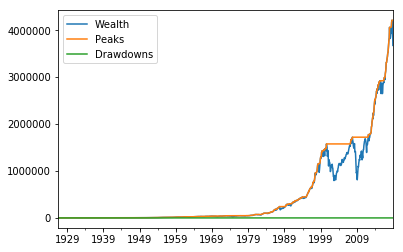

In [222]:
rk.compute_drawdown(rets).plot.line()